In [1]:
!git clone https://github.com/vyshnavigarapati/Water-Quality-Prediction-.git

Cloning into 'Water-Quality-Prediction-'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 255.24 KiB | 2.06 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


<Axes: >

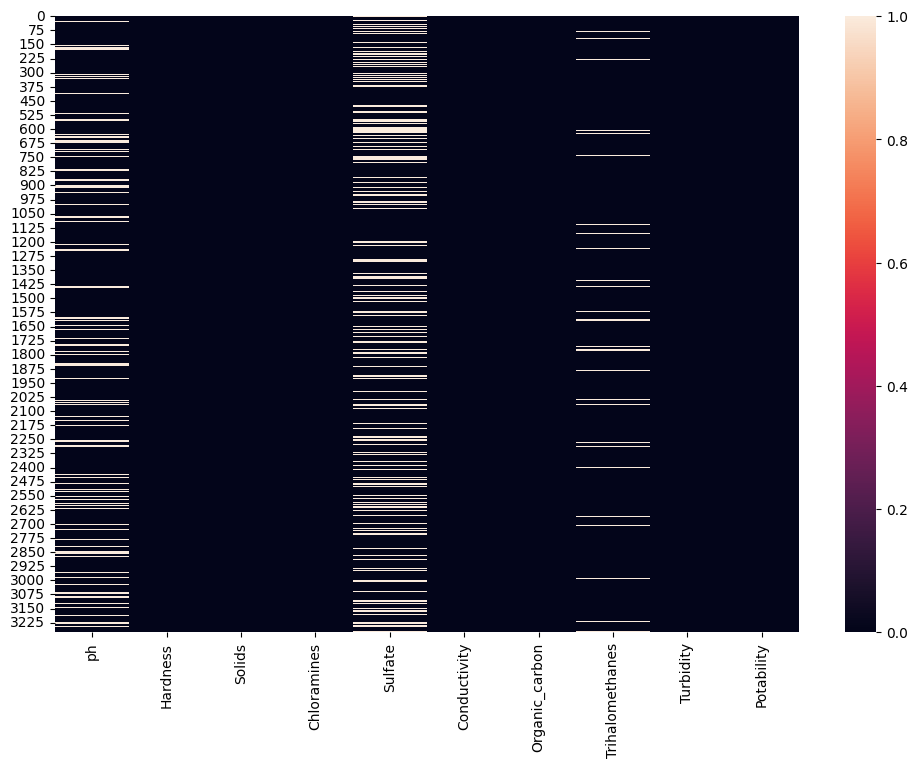

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

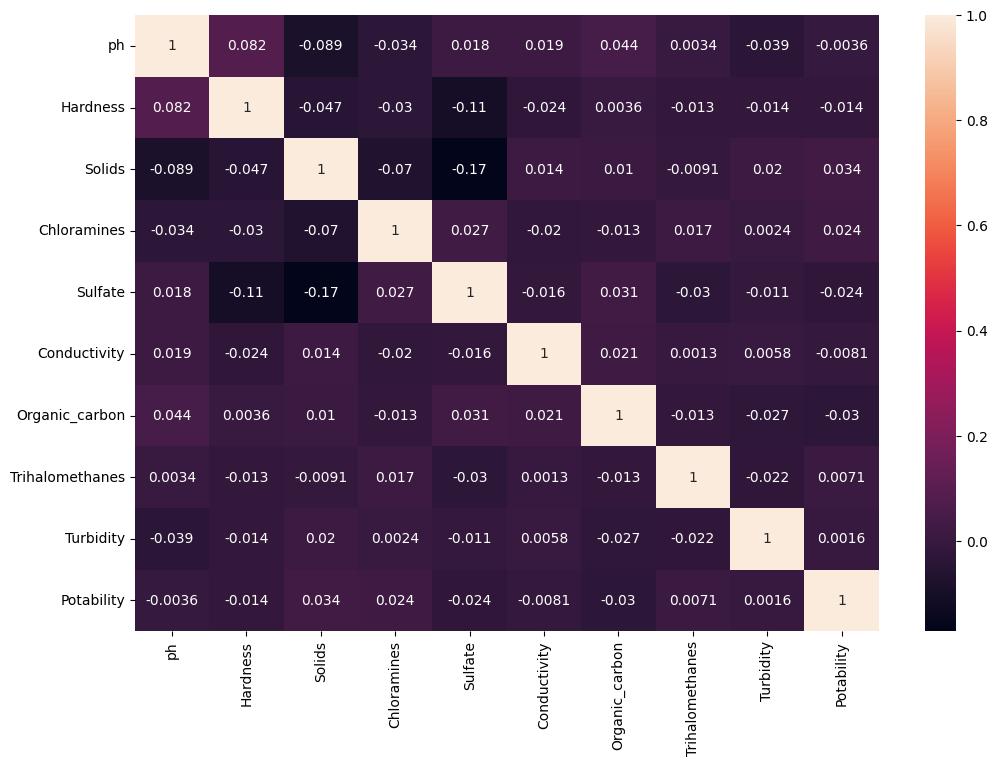

In [ ]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)



<Axes: xlabel='Potability', ylabel='count'>

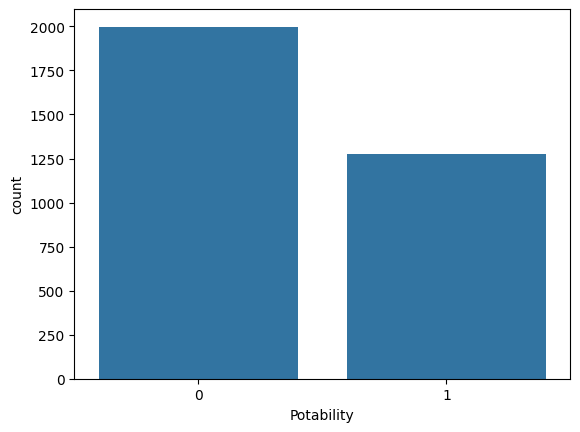

In [ ]:
sns.countplot(x="Potability", data=df)

In [ ]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


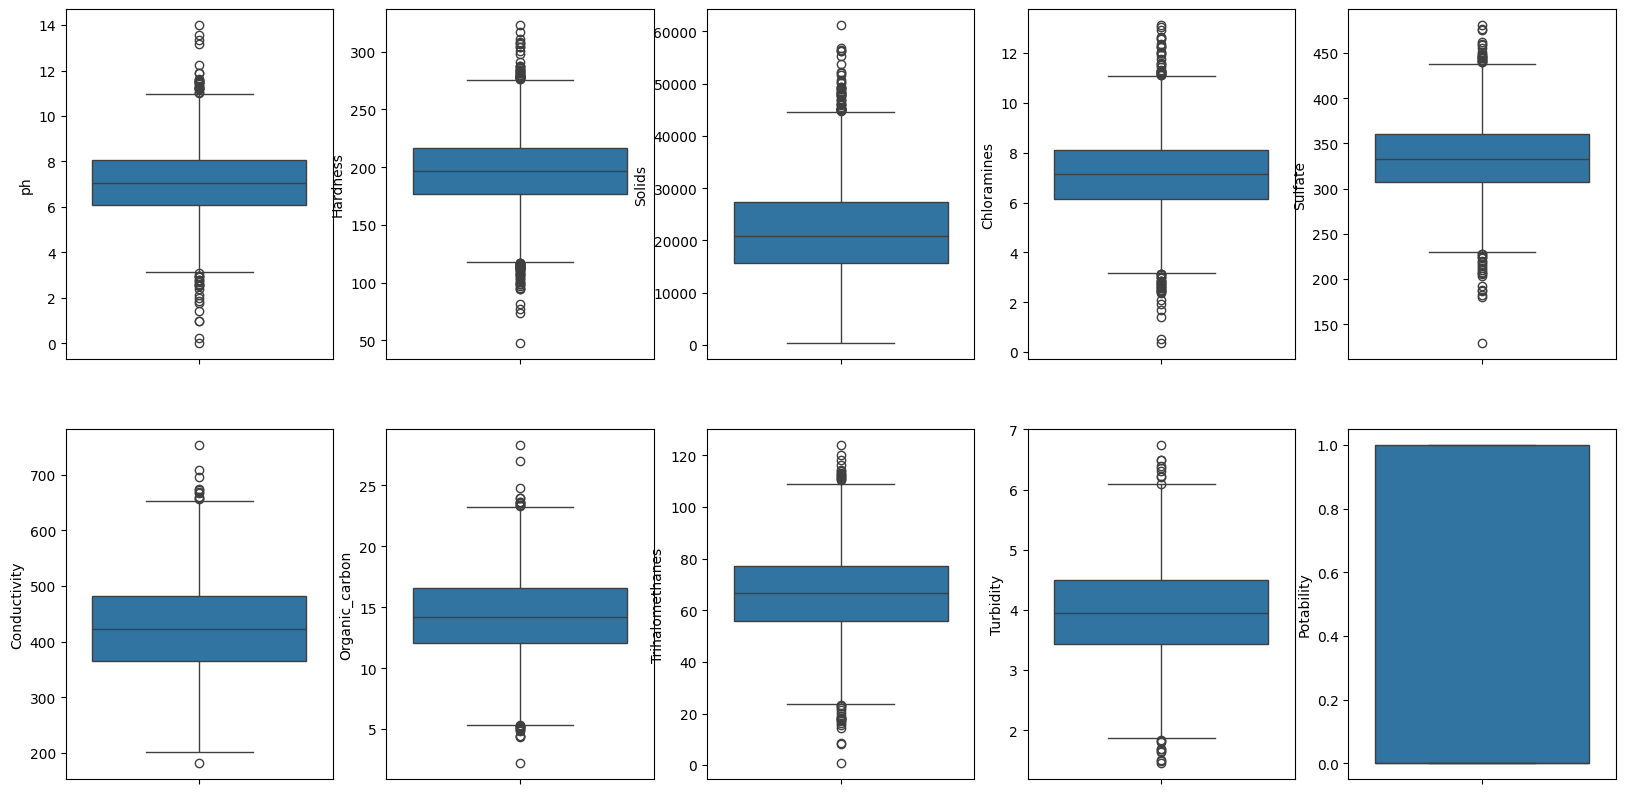

In [ ]:
fig , ax = plt.subplots(ncols=5 , nrows=2 , figsize=(20,10))

ax = ax.flatten()

index = 0

for col , value in df.items():
   sns. boxplot(y=col,data=df,ax=ax[index])
   index+=1

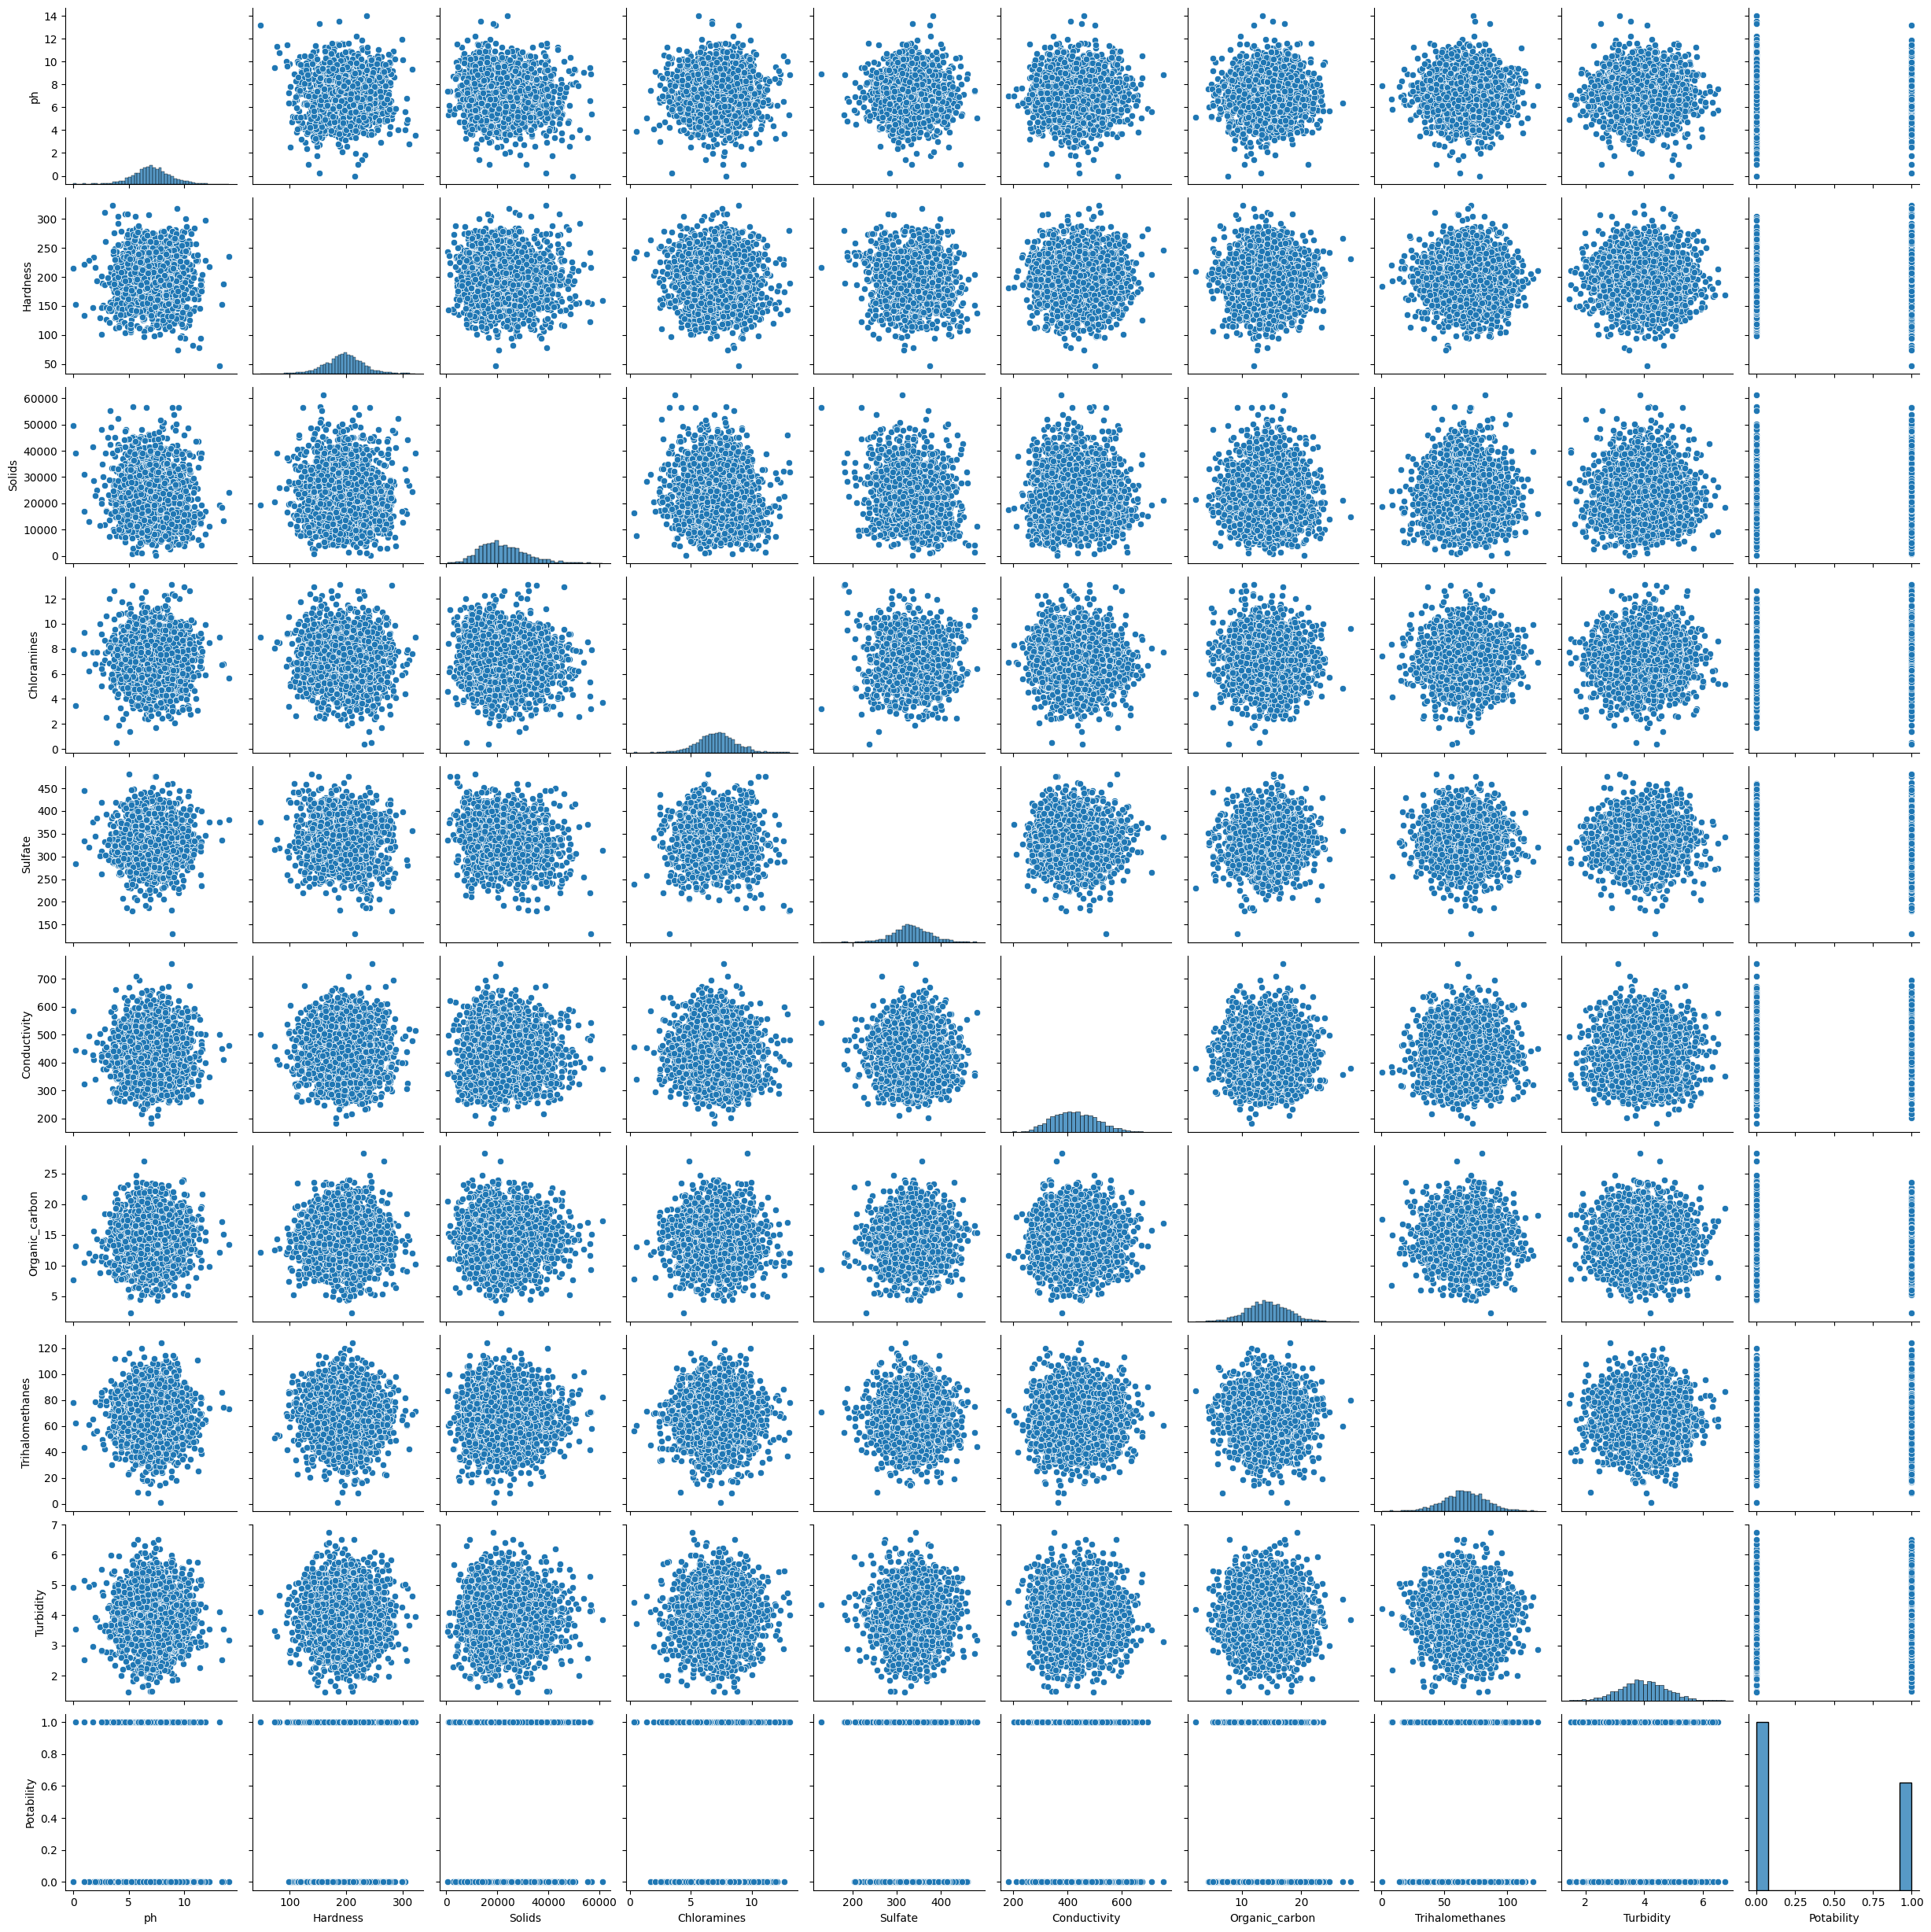

In [ ]:
sns.pairplot(df)

In [ ]:
fig = px.pie(df,names= "Potability", hole=0.4,template="plotly_dark")
fig.show()

In [ ]:
fig = px.scatter(df, x="ph", y="Sulfate", color="Potability",template="plotly_dark")
fig.show()

In [ ]:
fig = px.scatter(df, x="Organic_carbon", y="Hardness", color="Potability", template="plotly_dark")
fig.show()

Text(0, 0.5, 'percentage of missing values')

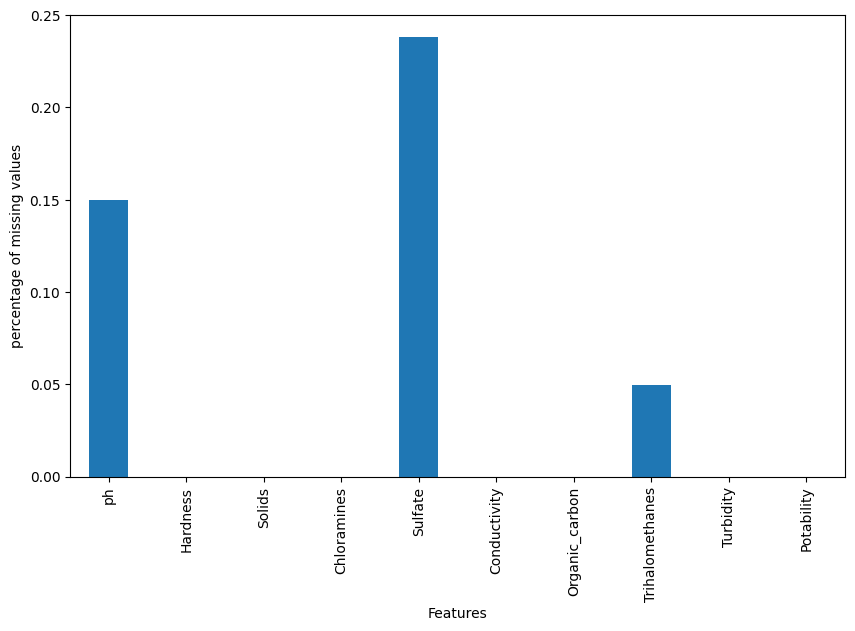

In [ ]:
df.isnull().mean().plot.bar(figsize = (10,6))
plt.xlabel("Features")
plt.ylabel("percentage of missing values")

In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [ ]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


<Axes: >

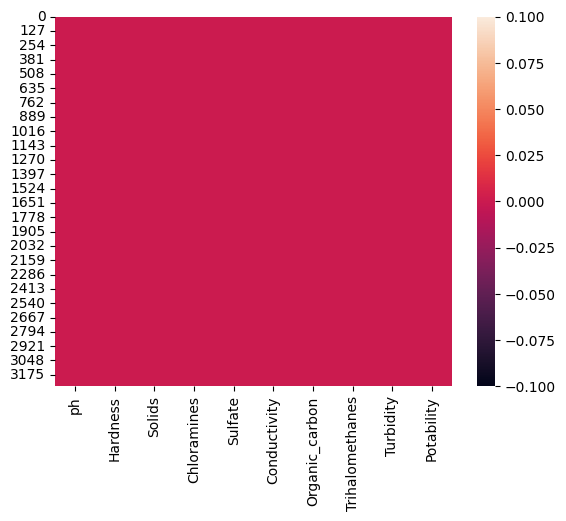

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
x = df.drop("Potability", axis=1)
y = df["Potability"]

In [ ]:
x.shape , y.shape

((3276, 9), (3276,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
x_train,x_test,y_tain,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape ,x_test.shape

((2620, 9), (656, 9))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

##Logistic Regression

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()
model_lr = LogisticRegression()

In [ ]:
#training model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#making prediction
pred_lr = model_lr.predict(x_test)

In [ ]:
# y_test = 1,0
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#accuracy_score
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr

0.6036585365853658

##Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating the model object
model_dt = DecisionTreeClassifier(max_depth= 4)

In [ ]:
#Trainig of decision
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#making prediction using decision tree
pred_dt = model_dt.predict(x_test)

In [ ]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt

0.5990853658536586

In [ ]:
#confusion matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[354,  42],
       [221,  39]])

#Random Forest Classifier

In [ ]:
from  sklearn.ensemble import RandomForestClassifier
#creating model object
model_rf = RandomForestClassifier()

In [ ]:
#Training model random forest
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#making prediction
pred_rf = model_rf.predict(x_test)


In [ ]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

69.51219512195121

In [ ]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[360,  36],
       [164,  96]])

KNN - K-NEAREST NEIGHBOUR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating Model object
model_knn = KNeighborsClassifier()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loop over different values of k (number of neighbors)
for i in range(4, 15):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)  # Train the model
    pred_knn = model_knn.predict(x_test)  # Predict on test set
    accuracy_score_knn = accuracy_score(y_test, pred_knn)  # Calculate accuracy
    print(i, accuracy_score_knn)  # Print k and its accuracy

4 0.6341463414634146
5 0.6280487804878049
6 0.6295731707317073
7 0.6387195121951219
8 0.635670731707317
9 0.6326219512195121
10 0.6387195121951219
11 0.6402439024390244
12 0.6387195121951219
13 0.6448170731707317
14 0.6509146341463414


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors= 11)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
print(i, accuracy_score_knn*100)

14 64.02439024390245


SVM-Super Vector Machine

In [ ]:
from sklearn.svm import SVC

#creating object model
model_svm = SVC(kernel = "rbf")


In [ ]:
#model training
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
#make prediction
pred_svm = model_svm.predict(x_test)

In [ ]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100


68.75

Adaboost classifiers

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import AdaBoostClassifier

# Making object of Model
model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.01)



In [ ]:
# Training the model
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [ ]:
#making prediction
pred_ada = model_ada.predict(x_test)

In [ ]:
#accuracy_check
accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

61.4329268292683

XGBoost

In [ ]:
from xgboost import XGBClassifier

#creating object of model
model_xgb = XGBClassifier(n_estimators=200,learning_rate=0.03)

In [ ]:
#training model
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction
xgb = model_xgb.predict(x_test)

In [ ]:
#accuracy
accuracy_score_xgb = accuracy_score(y_test,xgb)
accuracy_score_xgb*100

69.66463414634147

In [ ]:
models = pd.DataFrame({
    "model": ["logistic regression",
                "decision tree",
                "random forest",
                "kNN",
                "SVM",
                "Adaboost",
                "xGBoost"],
    "Accuracy": [accuracy_score_lr,
                 accuracy_score_dt,
                 accuracy_score_rf,
                 accuracy_score_knn,
                 accuracy_score_svm,
                 accuracy_score_ada,
                 accuracy_score_xgb]
})


In [ ]:
models

,model,Accuracy
0,logistic regression,0.603659
1,decision tree,0.599085
2,random forest,0.695122
3,kNN,0.640244
4,SVM,0.687500
5,Adaboost,0.614329
6,xGBoost,0.696646


,model,Accuracy
6,xGBoost,0.696646
2,random forest,0.695122
4,SVM,0.687500
3,kNN,0.640244
5,Adaboost,0.614329
0,logistic regression,0.603659
1,decision tree,0.599085


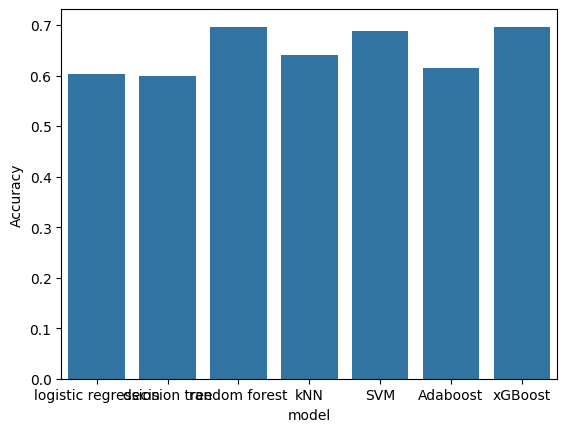

In [ ]:
sns.barplot(x = "model", y = "Accuracy", data = models)
models.sort_values(by = "Accuracy", ascending = False)